In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [115]:
df = pd.read_csv("data.csv")
df.head(15)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


Text(0.5, 1.0, 'Histogram for diagnosis')

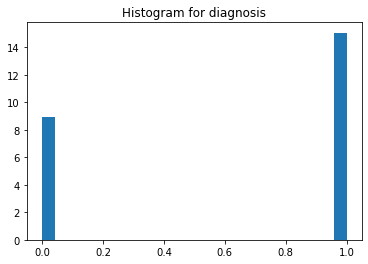

In [116]:
plt.hist(df["diagnosis"], bins = "sqrt", density = True)
plt.title("Histogram for diagnosis")

<AxesSubplot:>

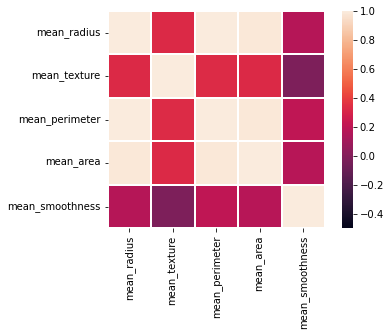

In [134]:
corr = df.iloc[:, :-1].corr(method="pearson")
sns.heatmap(corr, vmax=1, vmin=-.5, square=True, linewidths=.2)

<AxesSubplot:xlabel='mean_perimeter', ylabel='Count'>

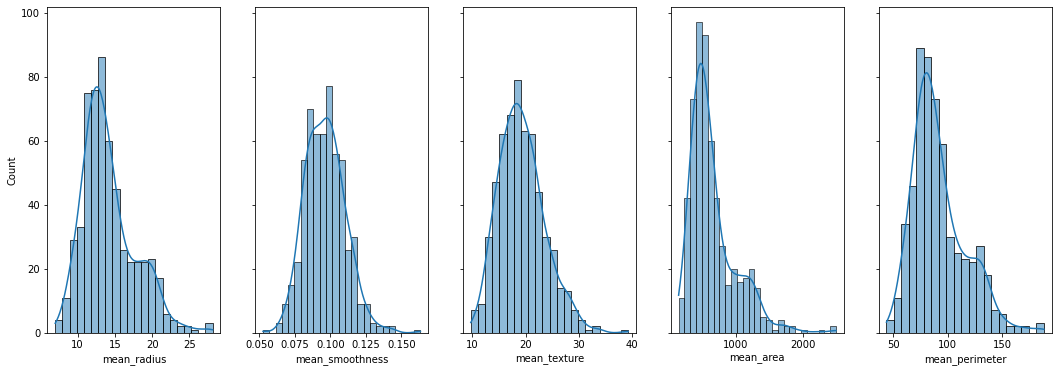

In [135]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="mean_radius", kde=True)
sns.histplot(df, ax=axes[1], x="mean_smoothness", kde=True)
sns.histplot(df, ax=axes[2], x="mean_texture", kde=True)
sns.histplot(df, ax=axes[3], x="mean_area", kde=True)
sns.histplot(df, ax=axes[4], x="mean_perimeter", kde=True)

In [136]:
def calculate_prior(data, Y):
    unique_classes = sorted(list(data[Y].unique()))
    
    prior_probabilities = []
    
    for i in unique_classes:
        count_class = len(data[data[Y] == i])
        
        prior_probabilities.append(count_class / len(data)) #prawdopodobieństwa wystąpienia danej klasy
    
    return prior_probabilities #P(Y = y) dla wszystkich y

In [137]:
#niektore wartości są ciągłe, więc można wyliczyć prawd. warunkowe gaussem
def prob_gaussian(data, column_name, column_value, Y, value):

    subset = data[data[Y] == value]
    
    mean, std = subset[column_name].mean(), subset[column_name].std()
    
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((column_value - mean)**2 / (2 * std**2)))  #prawdopodobieństwo wystąpienia wartości column_value
    
    return p_x_given_y

In [138]:
#Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

def naive_bayes_gauss(data, X, Y):
    names = list(df.columns)[:-1]

    prior = calculate_prior(data, Y)

    predicted_vals = []
    
    for sample in X:
        unique_vals = sorted(list(data[Y].unique()))
        prob = [1] * len(unique_vals)
        
        for j in range(len(unique_vals)):
            for i in range(len(names)):
                prob[j] *= prob_gaussian(data, names[i], sample[i], Y, unique_vals[j])

        posterior_prob = [1] * len(unique_vals)
        
        for j in range(len(unique_vals)):
            posterior_prob[j] = prob[j] * prior[j]

        predicted_vals.append(np.argmax(posterior_prob))

    return np.array(predicted_vals)


In [139]:
train, test = train_test_split(df, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_prediction = naive_bayes_gauss(train, X=X_test, Y="diagnosis")

print(confusion_matrix(Y_test, Y_prediction))
print(f1_score(Y_test, Y_prediction))

[[36  4]
 [ 2 72]]
0.9599999999999999


36 true negatives, 4 false positives, 2 false negatives, 72 true positives\

F1 rating 0.9599999 - ok
